<a href="https://colab.research.google.com/github/Allison-Lin/BigData/blob/master/Assessment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rJava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")  ##非互動性文字雲
install.packages("Rwordseg",repos="http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [2]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer



In [3]:
#載入文字、定義斷詞器
content <- "新冠疫情持續，歐美正在經歷第二波高峰。全球各地的疫苗研究和科學界對人體抗體和免疫力的研究也在如火如荼進行中。
現在科學界關注的關鍵問題是，感染新冠病毒後是否可以產生抗體免受再次感染，如果是，這種免疫能持續多久。科學家此前已知悉，人體在感染新冠病毒大約10天左右產生抗體，但隨時間流逝，抗體會逐漸減少。
目前英國的科學家發現感染新冠病毒六個月後免疫細胞仍對新冠病毒有反應，一種稱被為T細胞的免疫細胞會攻擊感染了病毒的細胞，這被稱為細胞免疫反應。

該研究由英國新冠病毒免疫學聯合會主導，英國伯明翰大學，曼徹斯特大學NIHR臨牀研究機構和英格蘭公共衛生署也參與其中。英格蘭公共衛生署流行病學家、研究報告的作者之一沙梅茲•拉德哈尼(Shamez Ladhani)表示：「T細胞反應可能比最初的抗體反應持續更久，這可能會對新冠疫苗的開發和免疫研究產生重大影響。」人體的免疫系統是抵抗感染的防禦系統，它分為兩個部分。
第一個是先天免疫反應。一旦有外來入侵者，它會釋放能引起炎症的化學物質來形成防止感染的物理屏障，以及釋放可破壞受感染細胞的白細胞。

但這個先天免疫系統對新冠病毒無效。

因此人體需要適應性的免疫反應。這包括產生能粘附病毒以阻止它的靶向抗體細胞，以及只攻擊被病毒感染的細胞的T細胞。

此前英國帝國理工學院的另一項研究表明人類自然感染病毒後身體產生的抗體水平「迅速消失」。人體免疫力減弱，並且有多次感染新冠病毒的風險。英國伯明翰大學的保羅·莫斯教授(Paul Moss)說，該研究是世界上第一個「顯示感染病毒六個月後身體仍具有強大細胞免疫能力」的研究。

在這項針對100人的研究中，有新冠症狀的人的T細胞反應更高。但尚不清楚這是否意味著能讓人類更好防止被二次感染。

該研究的樣本來自於從3月或4月感染了新冠病毒的23名男性和77名女性醫護人員。這些醫護人員呈輕至中度或無症狀，都未嚴重到住院治療。

研究人員說，良好的T細胞反應可能會為有症狀的人提供更多保護，從而使其免受二次感染。但也可能是無症狀的人能夠抵抗這種病毒，而無需建立較大的免疫反應。

他們說，在疫苗試驗中檢查T細胞反應非常重要。

莫斯教授說：「我們現在需要更多研究來發現有症狀的人將來是否能更好地防止被二次感染。」

英國免疫學學會主席安巴（Arne Akbar）教授稱該研究「是我們對新冠病毒免疫力的進一步理解，通過分析感染後T細胞對免疫力的貢獻，我們正朝更清晰地了解感染後個體保護這一複雜問題邁進。」
英國研究小組說，這些發現只是免疫力的「難題之一」，仍然有很多東西需要探究。這項研究尚未經過同行評議或發表在雜誌上。目前學界普遍認為人類體內的抗體持續時間不長，無法長期提供免疫保護，因此人類可能多次感染新冠病毒。新冠病毒的變異會跟流感病毒相似，跟人類長期共存。即使新冠疫苗研究成功，人類仍舊需要每年像接種流感疫苗一樣接種新冠疫苗來防止感染。

本次英國的研究雖然表明T細胞在感染新冠病毒六個月後仍舊對病毒有反應，仍能對人體提供免疫反應，是科學界帶來的好消息。但尚未知T細胞的免疫是否半年後會繼續。

這項採集100人樣本的研究未包括重症和入院治療的人群，目前未知他們體內是否有T細胞產生免疫反應。以及無症狀感染者的T細胞反應如何。

這些都是科學界未來需要研究和回答的問題。"
cutter <- worker(bylines = F)
cutter[content]

[1] "新冠"         "疫情"         "持續"         "歐美"         "正在"        
  [6] "經歷"         "第二"         "波"           "高峰"         "全球"        
 [11] "各地"         "的"           "疫苗"         "研究"         "和"          
 [16] "科學界"       "對"           "人體"         "抗體"         "和"          
 [21] "免疫力"       "的"           "研究"         "也"           "在"          
 [26] "如火如荼"     "進行"         "中"           "現在"         "科學界"      
 [31] "關注"         "的"           "關鍵問題"     "是"           "感染"        
 [36] "新冠"         "病毒"         "後"           "是否"         "可以"        
 [41] "產生"         "抗體"         "免受"         "再次"         "感染"        
 [46] "如果"         "是"           "這種"         "免疫"         "能"          
 [51] "持續"         "多久"         "科學家"       "此前"         "已"          
 [56] "知悉"         "人體"         "在"           "感染"         "新冠"        
 [61] "病毒"         "大約"         "10"           "天"           "左右"        
 [66] "產生"         "抗體"         "但"           "隨"           "時間"        
 [71] "流逝"         "抗體"         "會"           "逐漸"         "減少"        
 [76] "目前"         "英國"         "的"           "科學家"       "發現"        
 [81] "感染"         "新冠"         "病毒"         "六個月"       "後"          
 [86] "免疫"         "細胞"         "仍"           "對"           "新冠"        
 [91] "病毒"         "有"           "反應"         "一種"         "稱"          
 [96] "被"           "為"           "T"            "細胞"         "的"          
[101] "免疫"         "細胞"         "會"           "攻擊"         "感染"        
[106] "了"           "病毒"         "的"           "細胞"         "這被"        
[111] "稱"           "為"           "細胞"         "免疫"         "反應"        
[116] "該"           "研究"         "由"           "英國"         "新冠"        
[121] "病毒"         "免疫學"       "聯合會"       "主導"         "英國"        
[126] "伯明翰"       "大學"         "曼徹斯特大學" "NIHR"         "臨牀"        
[131] "研究"         "機構"         "和"           "英格蘭"       "公共"        
[136] "衛生署"       "也"           "參與"         "其中"         "英格蘭"      
[141] "公共"         "衛生署"       "流行病學"     "家"           "研究"        
[146] "報告"         "的"           "作者"         "之一"         "沙梅茲"      
[151] "拉德"         "哈尼"         "Shamez"       "Ladhani"      "表示"        
[156] "T"            "細胞"         "反應"         "可能"         "比"          
[161] "最初"         "的"           "抗體"         "反應"         "持續"        
[166] "更久"         "這"           "可能"         "會"           "對"          
[171] "新冠"         "疫苗"         "的"           "開發"         "和"          
[176] "免疫"         "研究"         "產生"         "重大"         "影響"        
[181] "人體"         "的"           "免疫系統"     "是"           "抵抗"        
[186] "感染"         "的"           "防禦"         "系統"         "它"          
[191] "分為"         "兩個"         "部分"         "第一個"       "是"          
[196] "先天"         "免疫"         "反應"         "一旦"         "有"          
[201] "外來"         "入侵者"       "它會"         "釋放"         "能"          
[206] "引起"         "炎症"         "的"           "化學物質"     "來"          
[211] "形成"         "防止"         "感染"         "的"           "物理"        
[216] "屏障"         "以及"         "釋放"         "可"           "破壞"        
[221] "受"           "感染"         "細胞"         "的"           "白細胞"      
[226] "但"           "這個"         "先天"         "免疫系統"     "對"          
[231] "新冠"         "病毒"         "無效"         "因此"         "人體"        
[236] "需要"         "適應性"       "的"           "免疫"         "反應"        
[241] "這"           "包括"         "產生"         "能"           "粘附"        
[246] "病毒"         "以"           "阻止"         "它"           "的"          
[251] "靶向"         "抗體"         "細胞"         "以及"         "只"          
[256] "攻擊"         "被"           "病毒感染"     "的"           "細胞"        
[261] "的"           "T"            "細胞"         "此前"         "英國"        
[266] "帝國"         "理工學院"     "的"           "另"           "一項"        
[271] "研究"         "表明"         "人類"         "自然"         "感染"        
[276] "病毒"         "後"           "身體"         "

In [4]:
new_words <- c("新冠病毒","T細胞","英國新冠病毒免疫學聯合會","英格蘭公共衛生署")
#迴圈使用以加入多個詞
for(i in 1:length(new_words)){
  new_user_word(cutter, new_words[i])
}

content <- str_remove_all(content, "[0-9a-zA-Z]+?")
cutter[content]

[1] "新冠"                     "疫情"                    
  [3] "持續"                     "歐美"                    
  [5] "正在"                     "經歷"                    
  [7] "第二"                     "波"                      
  [9] "高峰"                     "全球"                    
 [11] "各地"                     "的"                      
 [13] "疫苗"                     "研究"                    
 [15] "和"                       "科學界"                  
 [17] "對"                       "人體"                    
 [19] "抗體"                     "和"                      
 [21] "免疫力"                   "的"                      
 [23] "研究"                     "也"                      
 [25] "在"                       "如火如荼"                
 [27] "進行"                     "中"                      
 [29] "現在"                     "科學界"                  
 [31] "關注"                     "的"                      
 [33] "關鍵問題"                 "是"                      
 [35] "感染"                     "新冠病毒"                
 [37] "後"                       "是否"                    
 [39] "可以"                     "產生"                    
 [41] "抗體"                     "免受"                    
 [43] "再次"                     "感染"                    
 [45] "如果"                     "是"                      
 [47] "這種"                     "免疫"                    
 [49] "能"                       "持續"                    
 [51] "多久"                     "科學家"                  
 [53] "此前"                     "已"                      
 [55] "知悉"                     "人體"                    
 [57] "在"                       "感染"                    
 [59] "新冠病毒"                 "大約"                    
 [61] "天"                       "左右"                    
 [63] "產生"                     "抗體"                    
 [65] "但"                       "隨"                      
 [67] "時間"                     "流逝"                    
 [69] "抗體"                     "會"                      
 [71] "逐漸"                     "減少"                    
 [73] "目前"                     "英國"                    
 [75] "的"                       "科學家"                  
 [77] "發現"                     "感染"                    
 [79] "新冠病毒"                 "六個月"                  
 [81] "後"                       "免疫"                    
 [83] "細胞"                     "仍"                      
 [85] "對"                       "新冠病毒"                
 [87] "有"                       "反應"                    
 [89] "一種"                     "稱"                      
 [91] "被"                       "為"                      
 [93] "細胞"                     "的"                      
 [95] "免疫"                     "細胞"                    
 [97] "會"                       "攻擊"                    
 [99] "感染"                     "了"                      
[101] "病毒"                     "的"                      
[103] "細胞"                     "這被"                    
[105] "稱"                       "為"                      
[107] "細胞"                     "免疫"                    
[109] "反應"                     "該"                      
[111] "研究"                     "由"                      
[113] "英國新冠病毒免疫學聯合會" "主導"                    
[115] "英國"                     "伯明翰"                  
[117] "大學"                     "曼徹斯特大學"            
[119] "臨牀"                     "研究"                    
[121] "機構"                     "和"                      
[123] "英格蘭公共衛生署"         "也"                      
[125] "參與"                     "其中"                    
[127] "英格蘭公共衛生署"         "流行病學"                
[129] "家"                       "研究"                    
[131] "報告"                     "的"                      
[133] "作者"                     "之一"                    
[135] "沙梅茲"                   "拉德"                    
[137] "哈尼"                     "表示"                    
[139] "細胞"                     "反應"                    
[141] "可能"                     "比"                      
[143] "最初"                     "的

In [8]:
new_words <- c("傳染性肺炎","醫療體系","防疫措施","世界各國")
writeLines(new_words,"new_words.txt")
stop_words <- c("的","和","對","也","在","是","能","後","仍","有","比","會")
writeLines(stop_words,"stop_words.txt")

In [9]:
cutter <- worker(user = "new_words.txt",stop_word = "stop_words.txt",bylines=FALSE)
seg_words <- cutter[content]
seg_words

[1] "新冠"         "疫情"         "持續"         "歐美"         "正在"        
  [6] "經歷"         "第二"         "波"           "高峰"         "全球"        
 [11] "各地"         "疫苗"         "研究"         "科學界"       "人體"        
 [16] "抗體"         "免疫力"       "研究"         "如火如荼"     "進行"        
 [21] "中"           "現在"         "科學界"       "關注"         "關鍵問題"    
 [26] "感染"         "新冠"         "病毒"         "是否"         "可以"        
 [31] "產生"         "抗體"         "免受"         "再次"         "感染"        
 [36] "如果"         "這種"         "免疫"         "持續"         "多久"        
 [41] "科學家"       "此前"         "已"           "知悉"         "人體"        
 [46] "感染"         "新冠"         "病毒"         "大約"         "天"          
 [51] "左右"         "產生"         "抗體"         "但"           "隨"          
 [56] "時間"         "流逝"         "抗體"         "逐漸"         "減少"        
 [61] "目前"         "英國"         "科學家"       "發現"         "感染"        
 [66] "新冠"         "病毒"         "六個月"       "免疫"         "細胞"        
 [71] "新冠"         "病毒"         "反應"         "一種"         "稱"          
 [76] "被"           "為"           "細胞"         "免疫"         "細胞"        
 [81] "攻擊"         "感染"         "了"           "病毒"         "細胞"        
 [86] "這被"         "稱"           "為"           "細胞"         "免疫"        
 [91] "反應"         "該"           "研究"         "由"           "英國"        
 [96] "新冠"         "病毒"         "免疫學"       "聯合會"       "主導"        
[101] "英國"         "伯明翰"       "大學"         "曼徹斯特大學" "臨牀"        
[106] "研究"         "機構"         "英格蘭"       "公共"         "衛生署"      
[111] "參與"         "其中"         "英格蘭"       "公共"         "衛生署"      
[116] "流行病學"     "家"           "研究"         "報告"         "作者"        
[121] "之一"         "沙梅茲"       "拉德"         "哈尼"         "表示"        
[126] "細胞"         "反應"         "可能"         "最初"         "抗體"        
[131] "反應"         "持續"         "更久"         "這"           "可能"        
[136] "新冠"         "疫苗"         "開發"         "免疫"         "研究"        
[141] "產生"         "重大"         "影響"         "人體"         "免疫系統"    
[146] "抵抗"         "感染"         "防禦"         "系統"         "它"          
[151] "分為"         "兩個"         "部分"         "第一個"       "先天"        
[156] "免疫"         "反應"         "一旦"         "外來"         "入侵者"      
[161] "它會"         "釋放"         "引起"         "炎症"         "化學物質"    
[166] "來"           "形成"         "防止"         "感染"         "物理"        
[171] "屏障"         "以及"         "釋放"         "可"           "破壞"        
[176] "受"           "感染"         "細胞"         "白細胞"       "但"          
[181] "這個"         "先天"         "免疫系統"     "新冠"         "病毒"        
[186] "無效"         "因此"         "人體"         "需要"         "適應性"      
[191] "免疫"         "反應"         "這"           "包括"         "產生"        
[196] "粘附"         "病毒"         "以"           "阻止"         "它"          
[201] "靶向"         "抗體"         "細胞"         "以及"         "只"          
[206] "攻擊"         "被"           "病毒感染"     "細胞"         "細胞"        
[211] "此前"         "英國"         "帝國"         "理工學院"     "另"          
[216] "一項"         "研究"         "表明"         "人類"         "自然"        
[221] "感染"         "病毒"         "身體"         "產生"         "抗體"        
[226] "水平"         "迅速"         "消失"         "人體"         "免疫力"      
[231] "減弱"         "並且"         "多次"         "感染"         "新冠"        
[236] "病毒"         "風險"         "英國"         "伯明翰"       "大學"        
[241] "保羅"         "莫"           "斯"           "教授"         "說"          
[246] "該"           "研究"         "世界"         "上"           "第一個"      
[251] "顯示"         "感染"         "病毒"         "六個月"       "身體"        
[256] "具有"         "強大"         "細胞"         "免疫能力"     "研究"        
[261] "這項"         "針對"         "人"           "研究"         "中"          
[266] "新冠"         "症狀"         "人"           "細胞"         "反應"        
[271] "更高"         "但"           "尚"           "不"           "清楚"        
[276] "這"           "是否"         "意味著"       "讓"           "人類"        
[281] "更好"         "防止"        

In [10]:
#計算詞彙頻率
txt_freq <- freq(seg_words)
#由大到小排列
txt_freq <- arrange(txt_freq, desc(freq))
#檢查前五名
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,感染,20
2,研究,20
3,細胞,19
4,病毒,18
5,新冠,17
6,反應,14


In [14]:
#為wordcloud定義字體，否則無法顯示中文
install.packages("showtext")
library(showtext)
showtext.auto(enable= TRUE)
par(family=("Microsoft YaHei"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



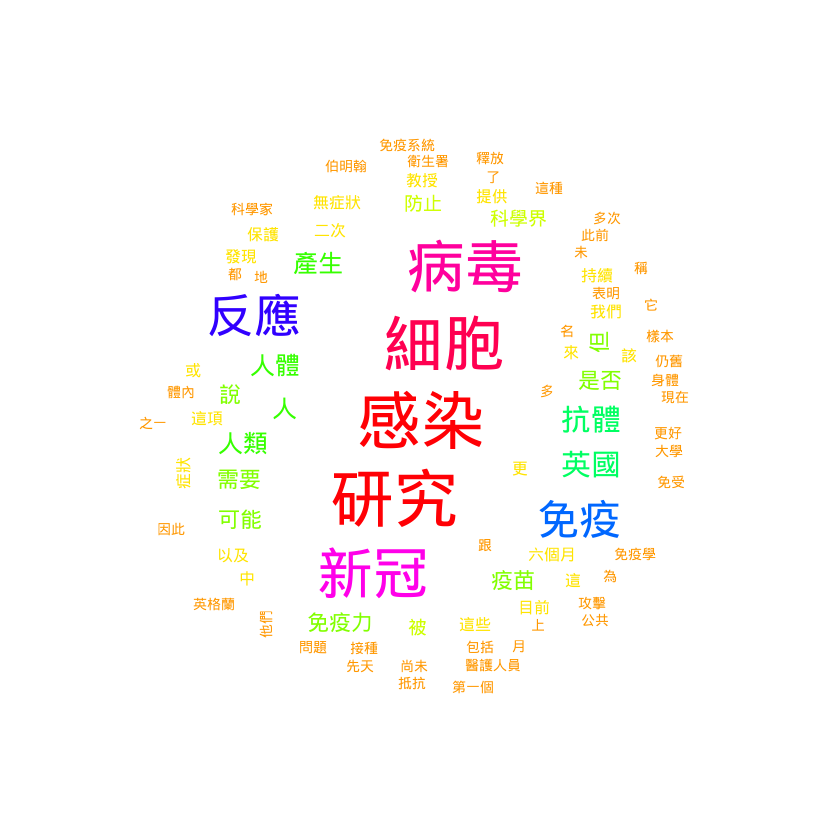

In [15]:
#文字雲(package: wordcloud)
wordcloud(txt_freq$char, txt_freq$freq, min.freq = 2, random.order = F, ordered.colors = F,
colors=rainbow(nrow(txt_freq)))